In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=edd0664d253651d8afb34acd7cd805d0a39532c4bf054414029af1606e15fe59
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [30]:
from qiskit.providers.fake_provider import GenericBackendV2

In [4]:
Jx = np.array([[0, 1], [1, 0]])
Jy = np.array([[0, -1.0j], [1.0j, 0]])

In [5]:
omega_x = 2.3
omega_y = 3.1
Delta_t = 0.05

In [6]:
from qiskit.circuit.library import HamiltonianGate

In [9]:
ga_U1 = HamiltonianGate(Jx, time=omega_x * Delta_t, label = '$J_x$').control(1)
ga_U2 = HamiltonianGate(Jy, time=omega_y * Delta_t, label = '$J_y$').control(1)

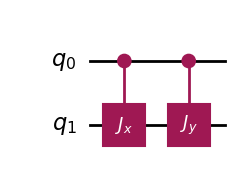

In [10]:
qc = QuantumCircuit(2)
qc.append(ga_U1, [0, 1])
qc.append(ga_U2, [0, 1])
qc.draw('mpl')

In [13]:
ga_UDelta_t = qc.to_gate(label = '$U(\Delta t)$')

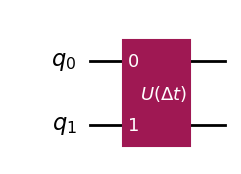

In [14]:
qc2 = QuantumCircuit(2)
qc2.append(ga_UDelta_t, [0, 1])
qc2.draw('mpl')

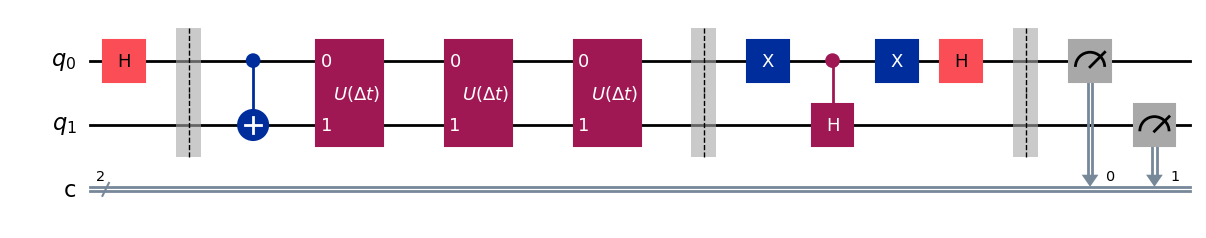

In [29]:
qc_sim = QuantumCircuit(2,2)
qc_sim.h(0)
qc_sim.barrier()
# preparación del estado inicial a |1>
qc_sim.cx(0, 1)
qc_sim.append(ga_UDelta_t, [0, 1])
qc_sim.append(ga_UDelta_t, [0, 1])
qc_sim.append(ga_UDelta_t, [0, 1])
qc_sim.barrier()
qc_sim.x(0)
qc_sim.ch(0, 1)
qc_sim.x(0)
qc_sim.h(0)
qc_sim.barrier()
qc_sim.measure([0, 1], [0, 1])
qc_sim.draw('mpl')

In [17]:
Statevector(qc_sim).draw('latex')

<IPython.core.display.Latex object>

In [31]:
backend = GenericBackendV2(2)
shots = 1024
qc_tran = transpile(qc_sim, backend)
job = backend.run(qc_tran, shots = shots)
counts = job.result().get_counts()

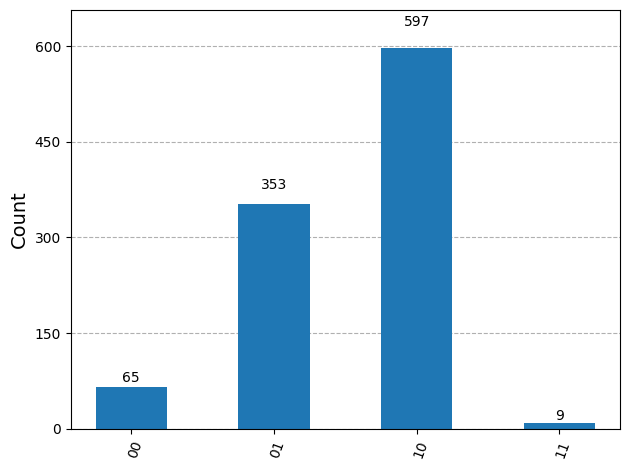

In [34]:
p00=counts['00']/shots
p01=counts['01']/shots
p10=counts['10']/shots
p11=counts['11']/shots
print(p00, p01, p10, p11)

0.0634765625 0.3447265625 0.5830078125 0.0087890625


In [42]:
alpha1=np.sqrt(2*(p00+p01-1/4))
phi1=np.arccos(np.sqrt(2)*(p00-p01)/alpha1)
alpha2=np.sqrt(2*(p10+p11-1/4))
phi2=np.arccos(np.sqrt(2)*(p10-p11)/alpha2)